# Predicting Car Prices

In this project, we'll predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). Here's a preview of the data set:

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 
        'aspiration', 'num_doors', 'body_style', 'drive_wheels', 
        'engine_location', 'wheel_base', 'length', 'width', 'height', 
        'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 
        'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 
        'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Before we proceed, we should select all the columns containing numerical values

In [2]:
numeric_cols = ['normalized_losses', 'wheel_base', 'length', 
                'width', 'height', 'curb_weight', 'bore', 
                'stroke', 'compression_ratio', 'horsepower', 
                'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[numeric_cols]

numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Cleaning the data

In [3]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Because `price` is the column we want to predict, let's remove any rows with missing `price` values.

In [5]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

For the `normalized_loss` column, we have 3 options. We could:
1. Replace the missing values using the average values from that column.
2. Drop the rows entirely (especially if other columns in those rows have missing values).
3. Drop the column entirely.

Let's do option 1!

In [6]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

Then we confirm that there's no more missing values.

In [7]:
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Next, let's normalize all columnns to range from 0 to 1 except the target column.

In [8]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

## Univariate Model

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def split_dataset(df: pd.DataFrame, 
                  randomize=True) -> (pd.DataFrame, pd.DataFrame):
    if randomize:
        np.random.seed(1)
        # Randomize order of rows in data frame.
        shuffled_index = np.random.permutation(df.index)
        rand_df = df.reindex(shuffled_index)
    else:
        rand_df = df
        
    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    return (train_df, test_df)


def knn_train_test(train_col: str,
                   target_col: str, 
                   df: pd.DataFrame) -> float:
    knn = KNeighborsRegressor()
    train_df, test_df = split_dataset(df)
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Let's modify the `knn_train_test()` function we wrote to accept a parameter for the k value.

In [10]:
def knn_train_test(train_col: str,
                   target_col: str, 
                   df: pd.DataFrame,
                   k_values: [int]) -> dict:
    train_df, test_df = split_dataset(df)
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        predicted_labels = knn.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}
k_values = [1,3,5,7,9]
train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars, k_values=k_values)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city_mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway_mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
 

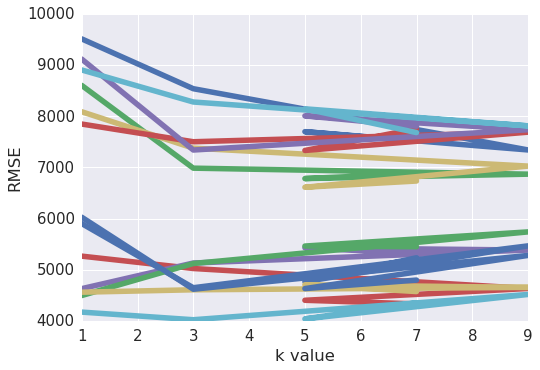

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5.5})

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

TODO: Comment about the graph above

Let's modify the `knn_train_test()` function we wrote in the last step to work with multiple columns.

## Multivariate Model

First, we compute **average RMSE** across different `k` values for each feature.

In [12]:
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_ratio    7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64

Let's modify the `knn_train_test()` function to accept a list of column names (instead of just a string). We will modify it so that:
- Instead of using just a single column for train and test, use all of the columns passed in.
- Use a the default k value from scikit-learn for now (we'll tune the k value in the next step).

In [13]:
def knn_train_test(train_cols: [str],
                   target_col: str,
                   df: pd.DataFrame,
                   k_values: [int]) -> dict:
    train_df, test_df = split_dataset(df)
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        predicted_labels = knn.predict(test_df[train_cols])
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [14]:
# Now, let's evaluate our function!
best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg', 'length']
k_values=[5]
min_features=2
max_features=len(best_features)+1
k_rmse_results = {str(i)+" best features":
                  knn_train_test(best_features[:i], 'price', numeric_cars, k_values=k_values) 
                  for i in range(min_features, max_features)}

k_rmse_results

{'2 best features': {5: 3589.3132622073304},
 '3 best features': {5: 3305.9401397969677},
 '4 best features': {5: 3280.3807311630976},
 '5 best features': {5: 3341.6024539726504},
 '6 best features': {5: 3628.261188214127}}

We see that using 3,4,and 5 best features yield in lower rmse.
Let's now optimize the model that performed the best in the previous step.

In [15]:
k_values = list(range(1, 25))
min_features=3
max_features=len(best_features)
k_rmse_results = {str(i)+" best features":
                  knn_train_test(best_features[:i], 'price', numeric_cars, k_values=k_values) 
                  for i in range(min_features, max_features)}

k_rmse_results

{'3 best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103372868,
  16: 4394.4846551644205,
  17: 4510.399710057406,
  18: 4584.310961865486,
  19: 4636.62620477063,
  20: 4664.465847866811,
  21: 4724.096637428273,
  22: 4752.535484102914,
  23: 4808.703310452101,
  24: 4858.9452710176065},
 '4 best features': {1: 2516.589279950226,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.269482641261,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.998621362245,
  10: 4042.247226187899,
  11: 4230.335248684068,
  12: 4354.008675154061,
  13: 4461.626664877788,
  14: 4468.029845088927,
  15: 4444.16440767

Let's answer these following questions:
- Which k value is optimal for each model? 
- How different are the k values and what do you think accounts for the differences?

First, let's visualize it!

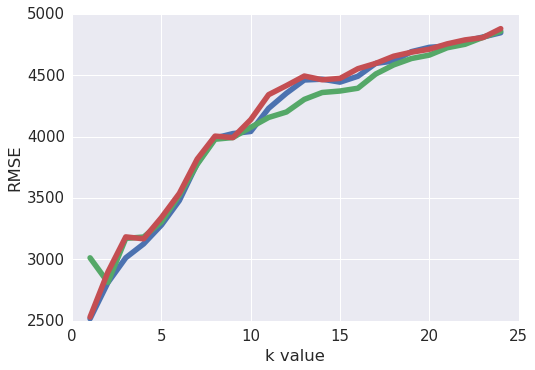

In [16]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

TODO:
make the graph prettier, add notation


# Conclusion

In this project, we have tried to predict a car's price using different parameters. We cleaned the data and determined the most optimal `k-value` for different model using k-fold cross validation.